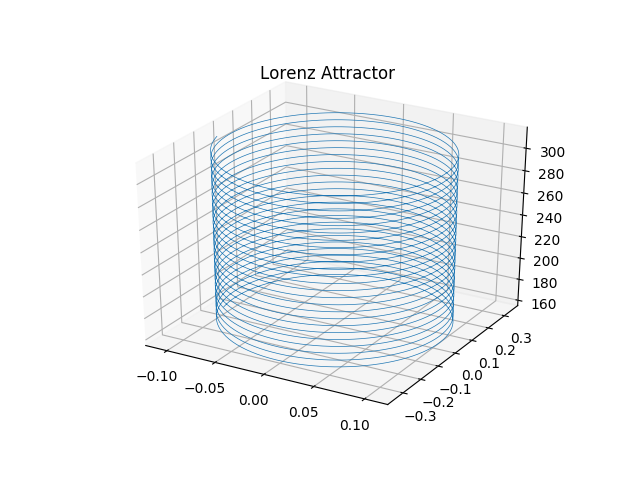

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def duffing(xyz, *, d=1, b=1):
    _, x, y, z = xyz
    x_dot = y
    y_dot = -d*y + x*x*x - x + b*np.sin(z)
    z_dot = np.pi
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000


xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + duffing(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

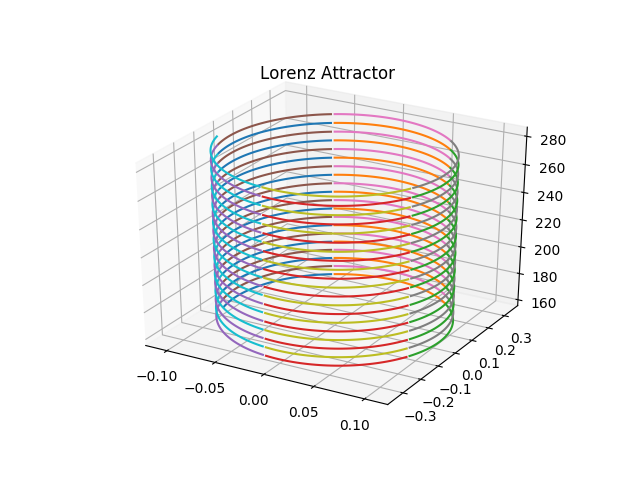

In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[5000:10000]
xyz_coords = xyz_coords[5000:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 40
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,100):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [3]:
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 9)
print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[ 0.25844399,  0.47324771, -1.80827048,  1.94821934, -0.54394012, -0.62683173,
  -1.99868916,  0.17727686, -0.21442314]]
def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)

project = True
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

Trajectory shape before embedding:
(40, 4)
[[ 1.29489132  3.45196306 -0.6525804   1.57047804  0.92897882  0.27382143
   0.03501694 -0.12169416  1.44313039]]
Trajectory shape after embedding and projecting:
(40, 2)


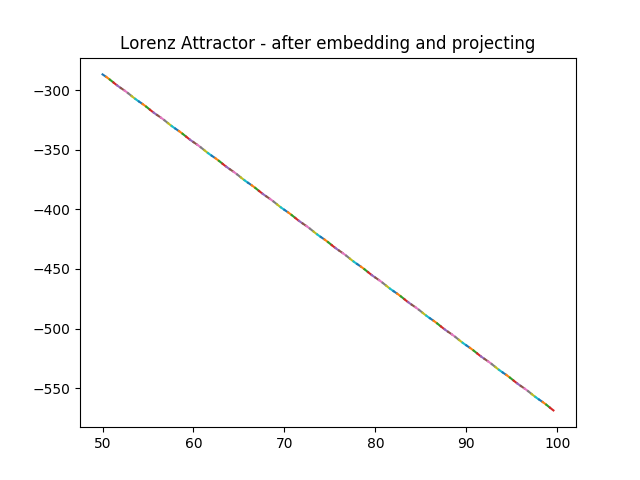

In [4]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Duffing Attractor - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Duffing Attractor - after embedding and projecting")
    plt.show()

In [19]:
t2s = Traj2Sim()

load=False

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='duffing_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='duffing_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='duffing_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='duffing_hdto1d.npy')

|█████████████████████████████▏          | ▂▂▄ 5546/7626 [73%] in 8:40 (10.(12.0/s, e▆▄▂ 19/7626 [0%] in 2s (12.1/s, ▅▇▇ 40/7626 [1%] in 3s (12.7/s, (12.8/s,  74/7626 [1%] in 6s (12.3/s,  ▂▂▄ 79/7626 [1%] in 7s (12.1/s, in 7s (12.1/s, ▇▅▃ 122/7626 [2%] in 10s (12.3/s 129/7626 [2%] in 11s (12.2/s (12.2/sin 13s (12.2/s169/7626 [2%] in 14s (12.2/s▆▄▂ 172/7626 [2%] in 14s (12.2/s ▃▁▃ 176/7626 [2%] in 14s (12.2/s182/7626 [2%] in 15s (12.0/s ▅▇▇ 184/7626 [2%] in 15s (12.0/s█▆▄ 207/7626 [3%] in 17s (11.9/sin 18s (11.8/s▆█▆ 229/7626 [3%] in 19s (11.9/s 269/7626 [4%] in 23s (11.9/s ▅▇▇ 305/7626 [4%] in 25s (12.0/s▄▂▂ 393/7626 [5%] in 33s (12.0/sin 33s (12.0/s (12.1/sin 38s (12.1/s ▆▄▂ 466/7626 [6%] in 39s (12.1/s 474/7626 [6%] in 39s (12.1/s477/7626 [6%] in 39s (12.1/s▆▄▂ 519/7626 [7%] in 43s (12.1/s569/7626 [7%] in 47s (12.2/s▄▂▂ 582/7626 [8%] in 48s (12.2/s (12.2/s 623/7626 [8%] in 51s (12.2/s (12.2/s(12.2/s(12.3/sin 56s (12.3/s697/7626 [9%] in 57s (12.3/s 699/7626 [9%] in 57s (12.3/s 706/762

|████████████████████████████████████████| 7626/7626 [100%] in 12:07.5 (10. ▆█▆ 5555/7626 [73%] in 8:41 (10. (10.5573/7626 [73%] in 8:43 (10. 5580/7626 [73%] in 8:43 (10. 5582/7626 [73%] in 8:44 (10.▇▇▅ 5617/7626 [74%] in 8:48 (10. 5627/7626 [74%] in 8:49 (10.5629/7626 [74%] in 8:49 (10.5639/7626 [74%] in 8:51 (10. ▃▅▇ 5644/7626 [74%] in 8:51 (10. 5647/7626 [74%] in 8:52 (10.▅▇▇ 5657/7626 [74%] in 8:53 (10. (10. (10.5674/7626 [74%] in 8:55 (10. (10.in 8:59 (10. ▂▂▄ 5704/7626 [75%] in 8:59 (10. ▁▃▅ 5706/7626 [75%] in 9:00 (10.▃▁▃ 5718/7626 [75%] in 9:01 (10. in 9:03 (10.5750/7626 [75%] in 9:06 (10. (10. ▂▄▆ 5765/7626 [76%] in 9:08 (10. 5791/7626 [76%] in 9:11 (10.▂▂▄ 5795/7626 [76%] in 9:11 (10. ▅▃▁ 5808/7626 [76%] in 9:13 (10. ▇▅▃ 5820/7626 [76%] in 9:15 (10. 5828/7626 [76%] in 9:16 (10. ▂▄▆ 5853/7626 [77%] in 9:21 (10.▇▇▅ 5858/7626 [77%] in 9:21 (10. ▁▃▅ 5866/7626 [77%] in 9:22 (10.in 9:23 (10. ▁▃▅ 5881/7626 [77%] in 9:24 (10. ▂▄▆ 5882/7626 [77%] in 9:24 (10. 5903/7626 [77%] in 9:27 (

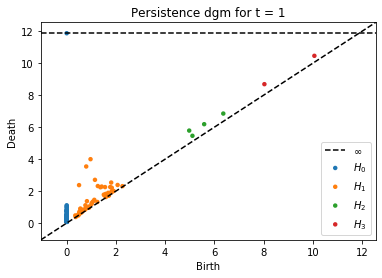

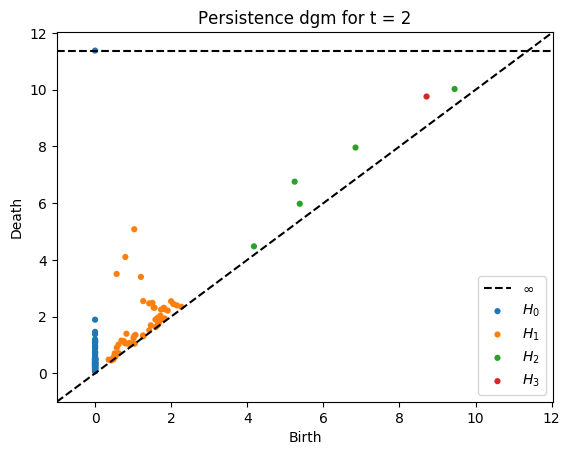

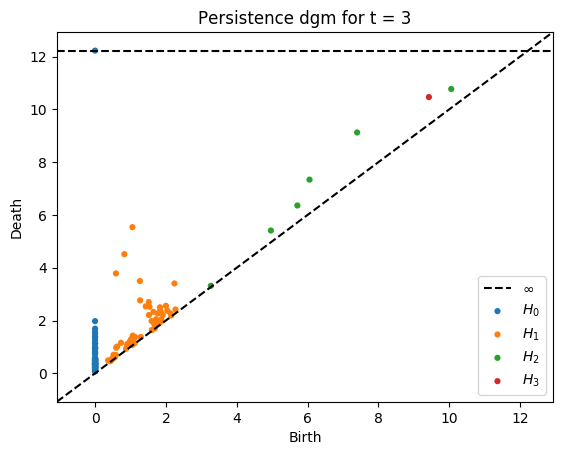

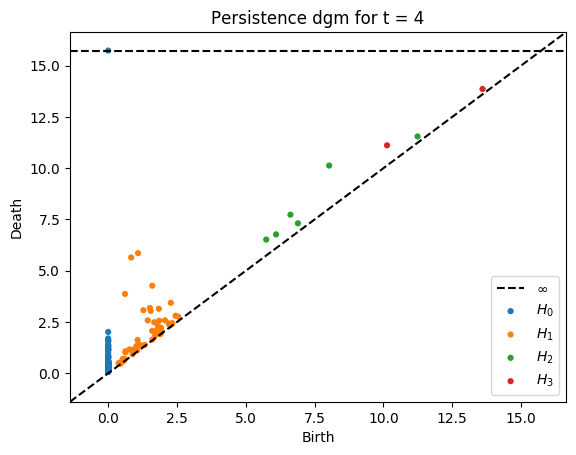

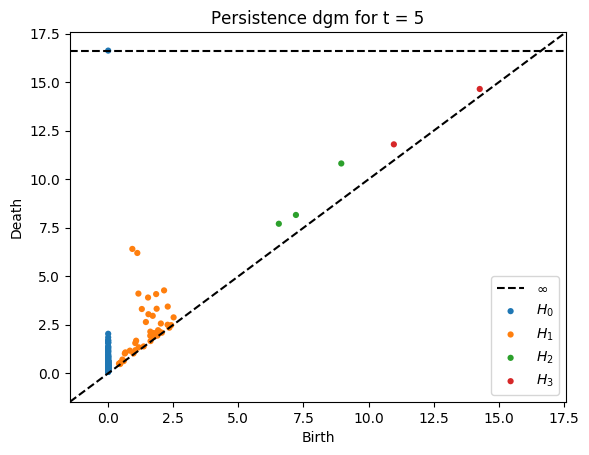

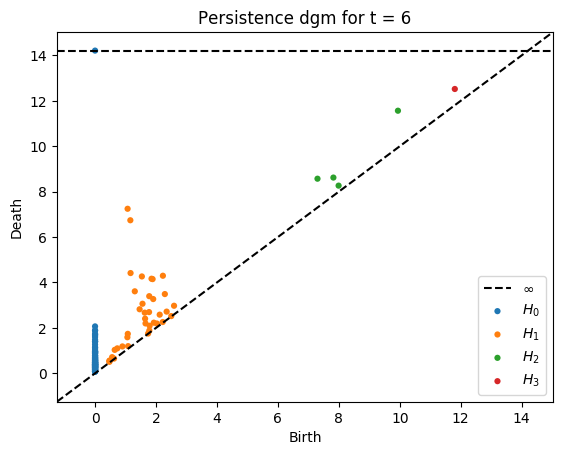

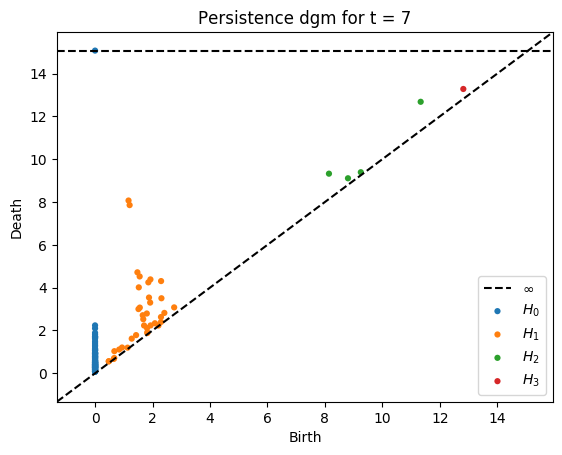

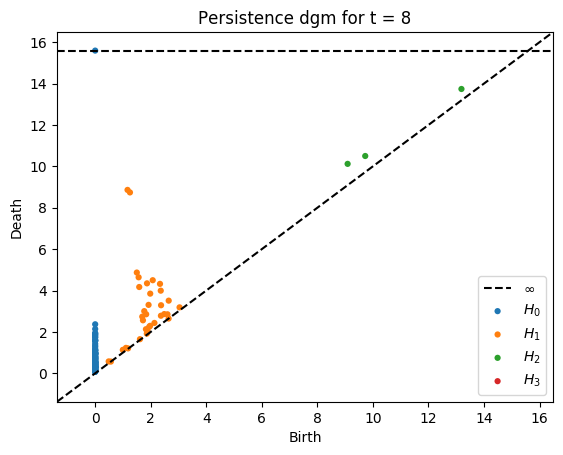

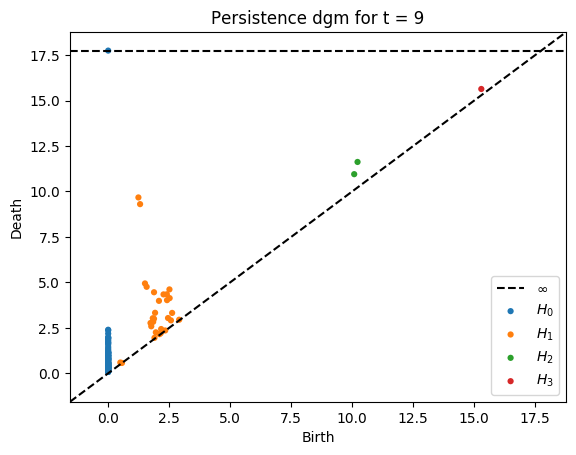

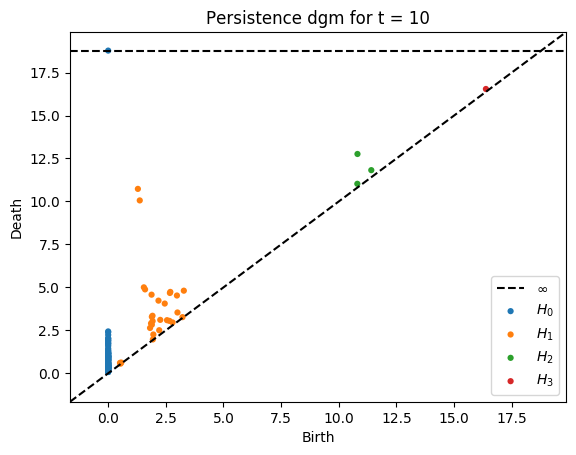

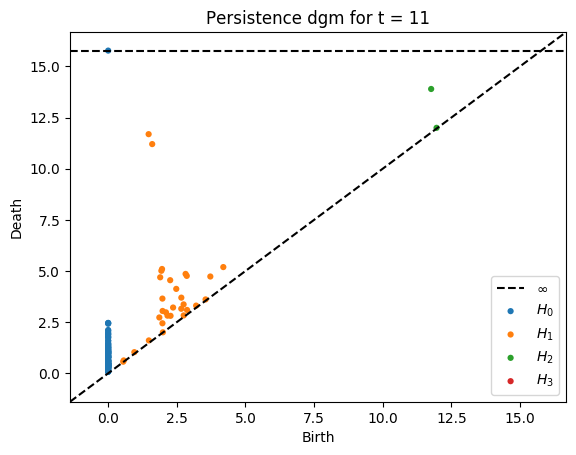

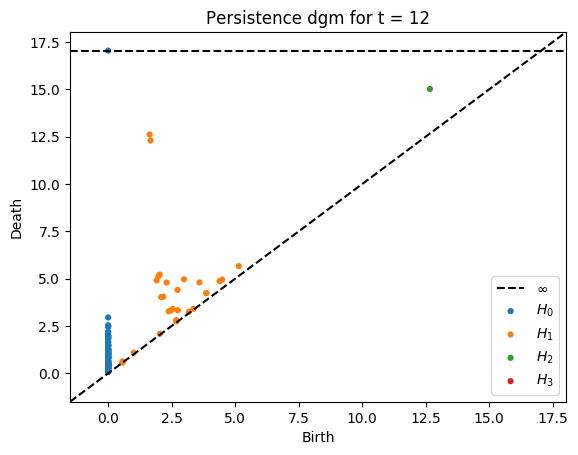

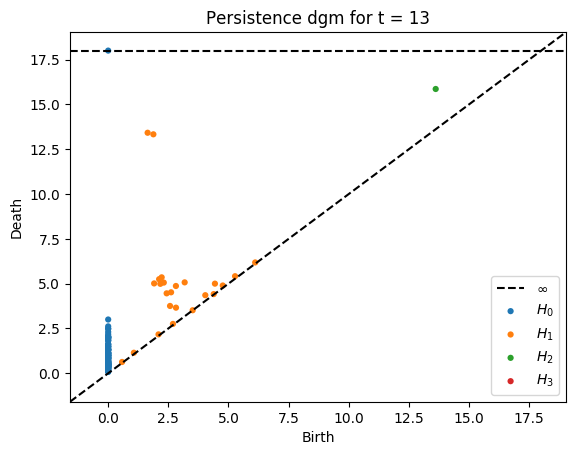

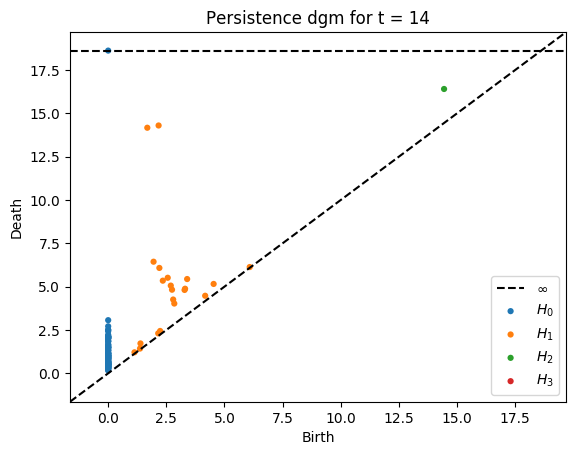

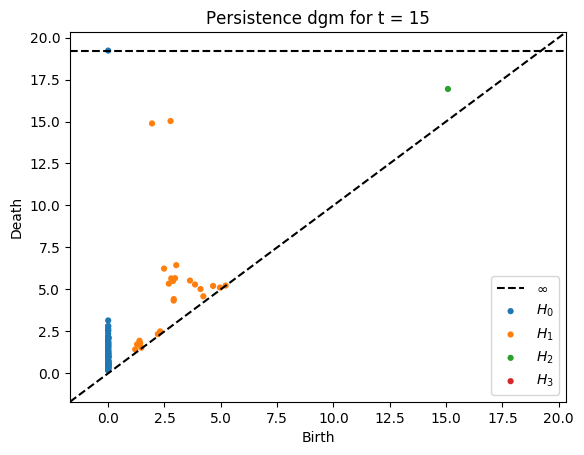

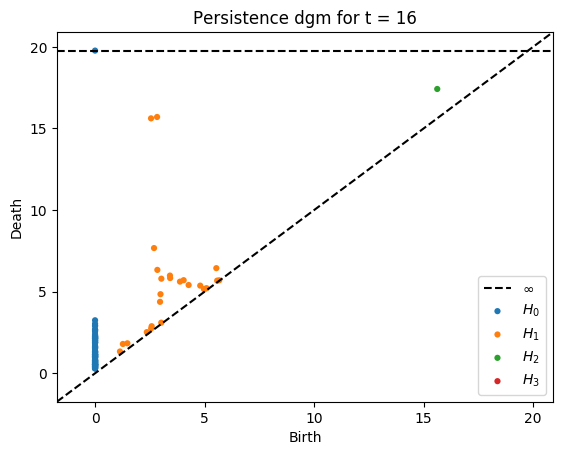

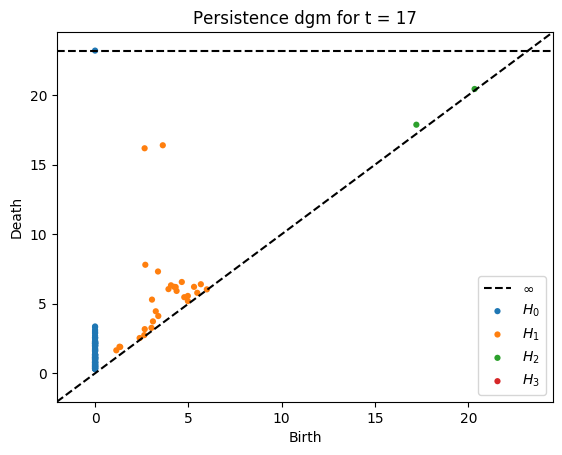

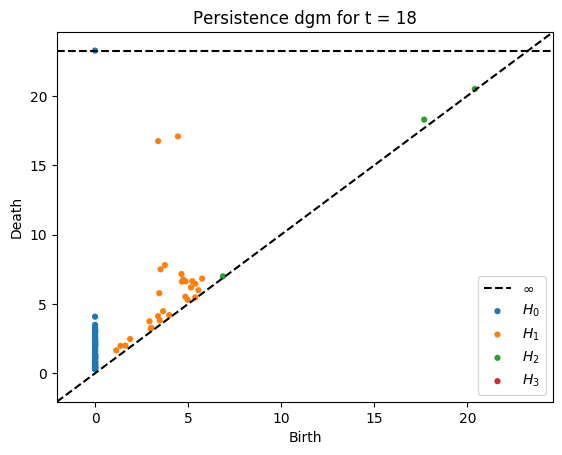

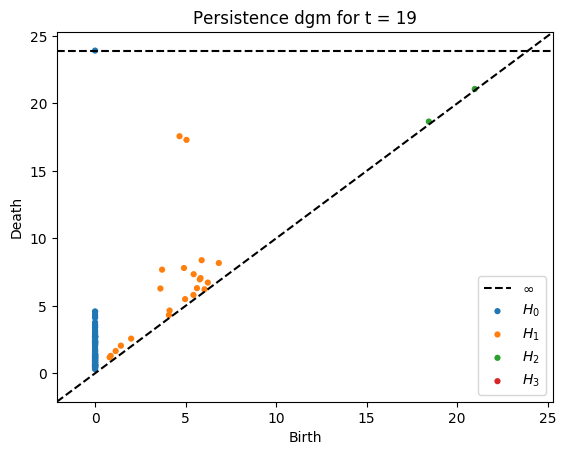

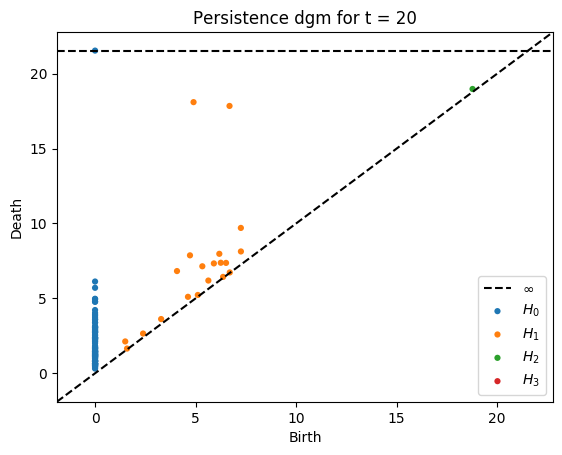

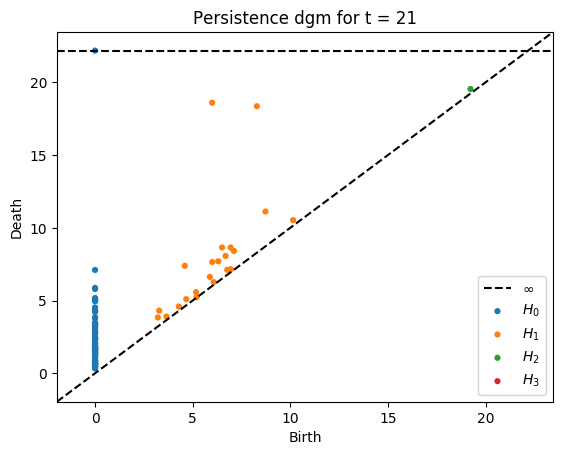

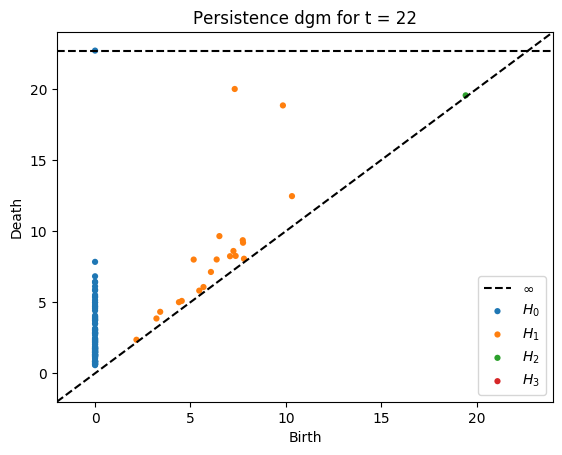

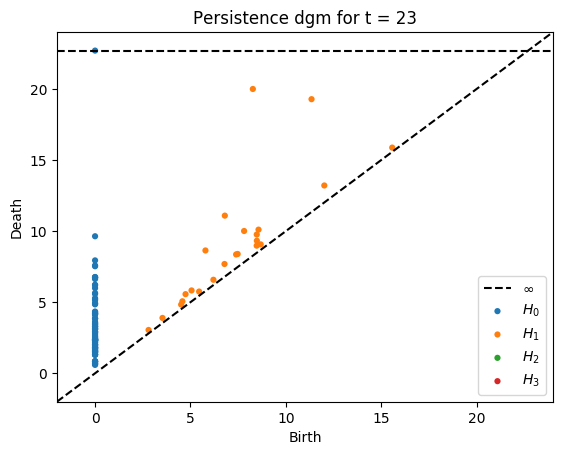

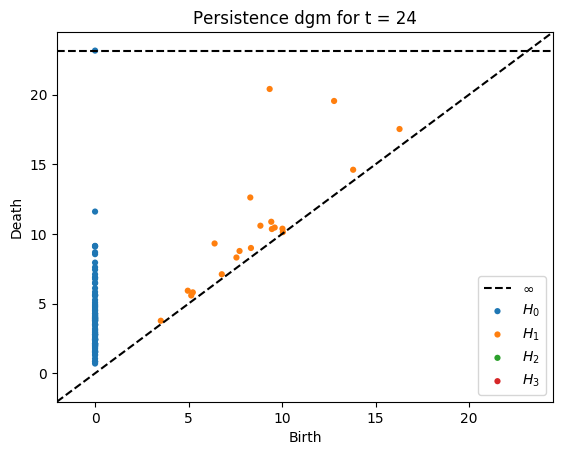

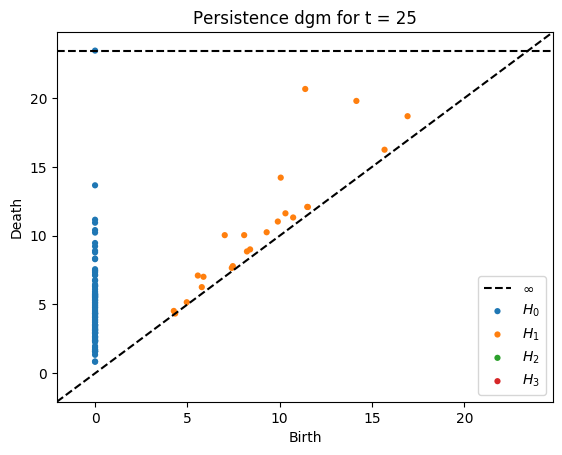

In [107]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

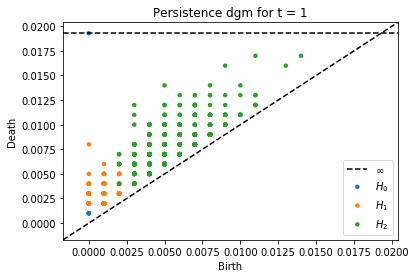

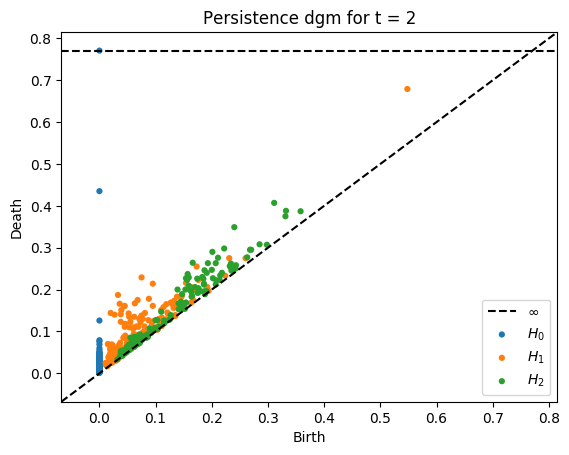

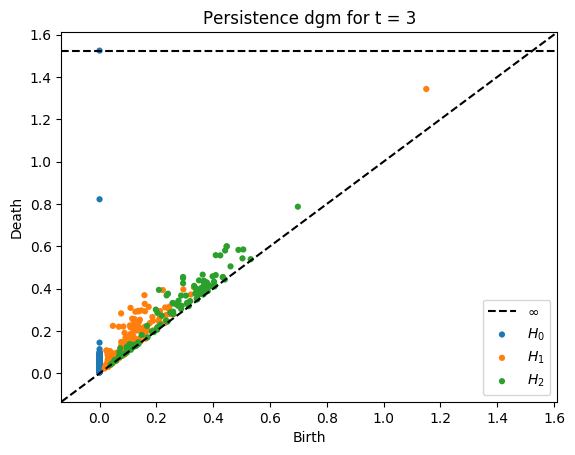

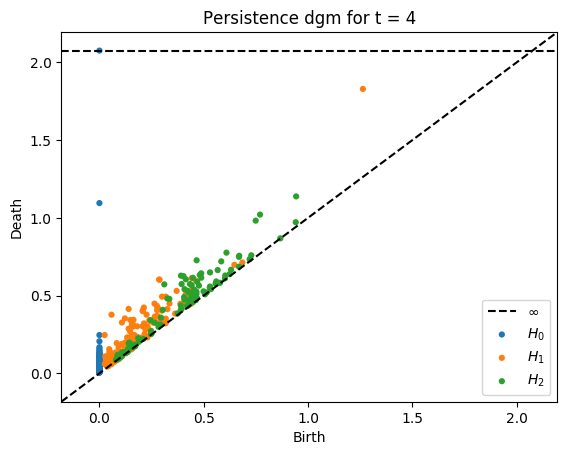

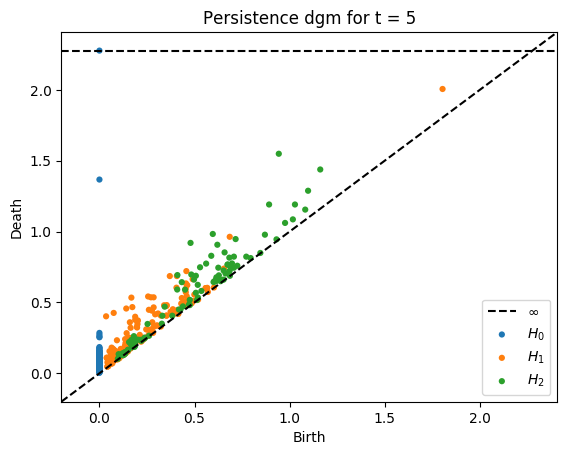

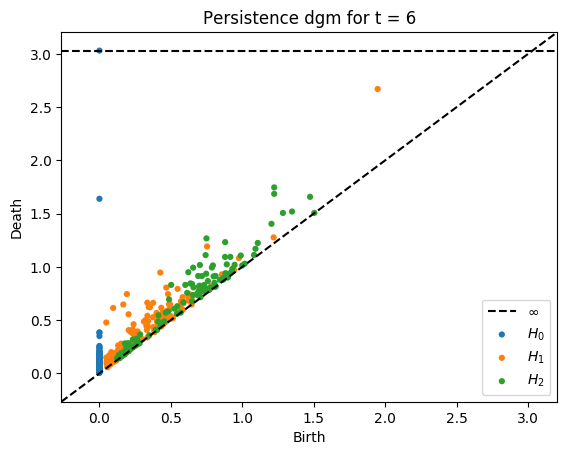

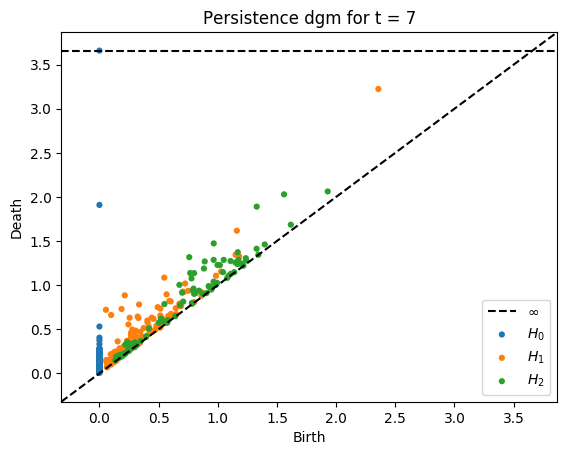

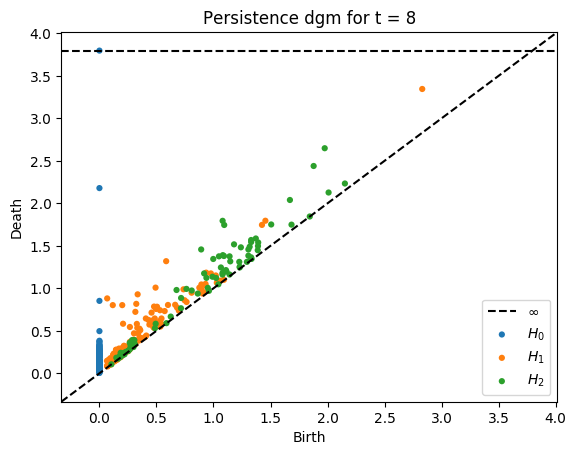

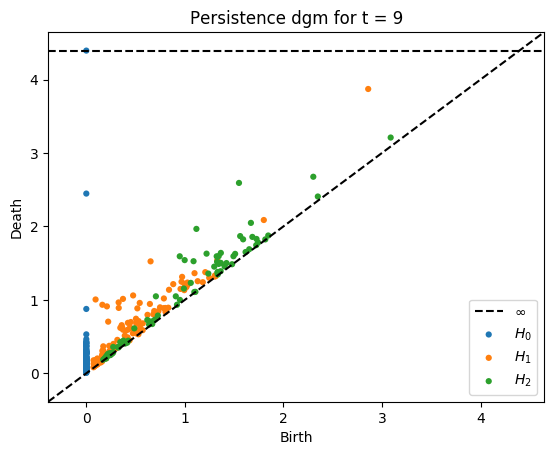

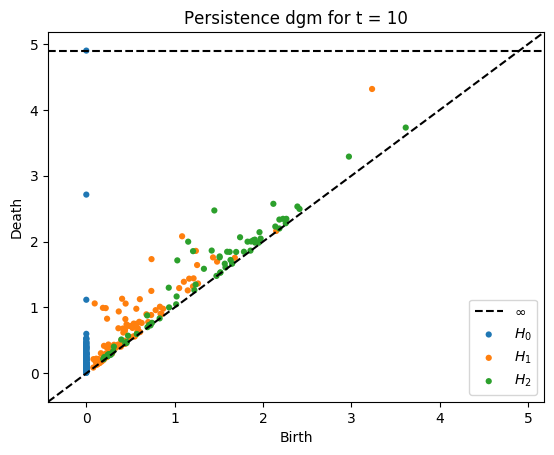

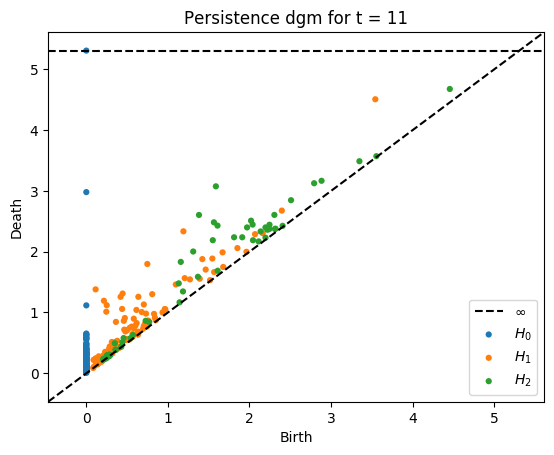

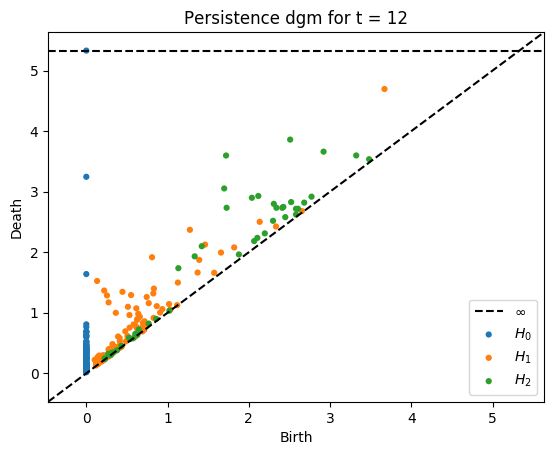

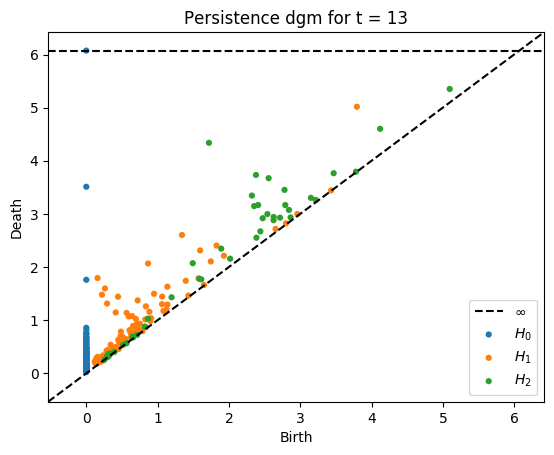

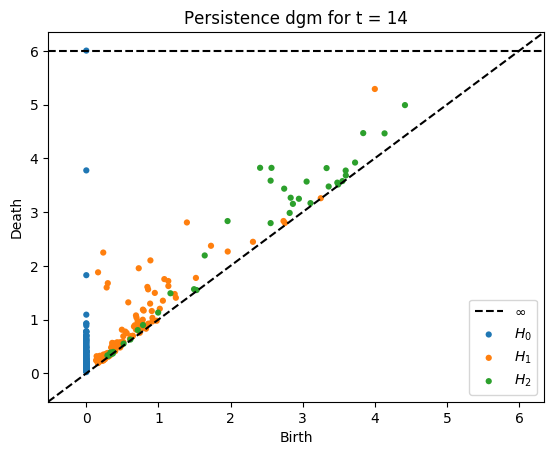

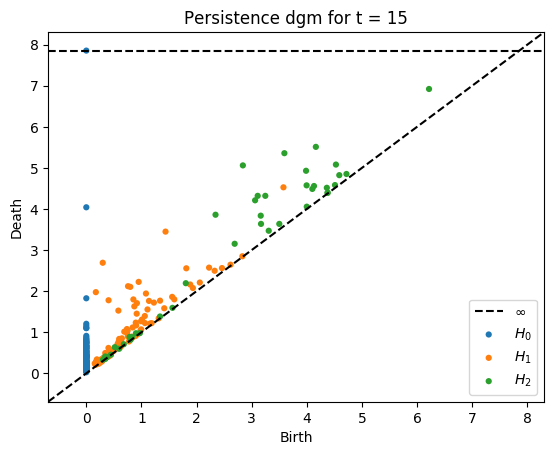

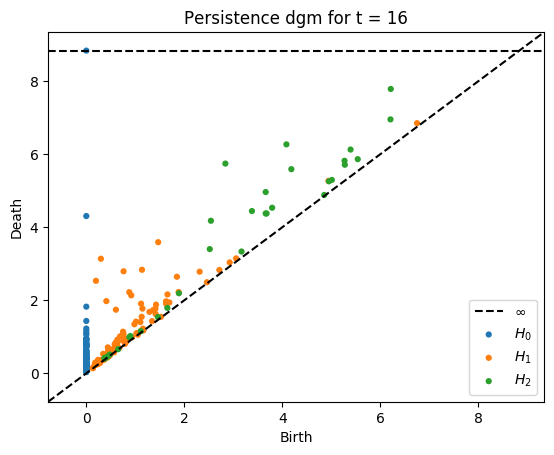

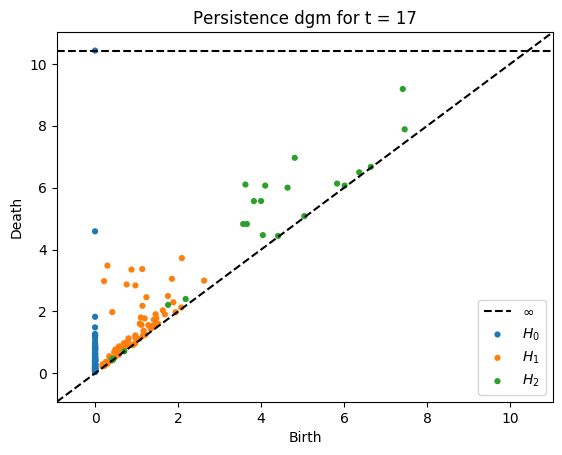

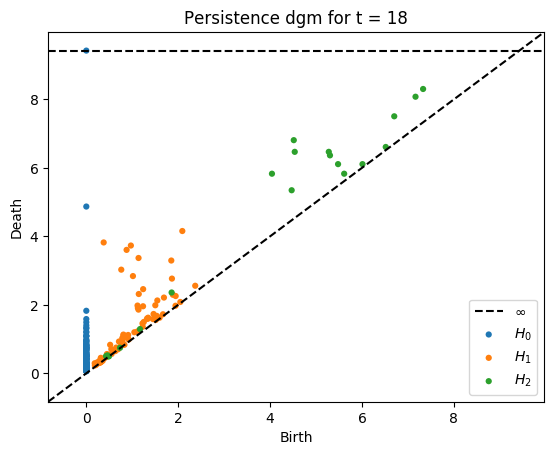

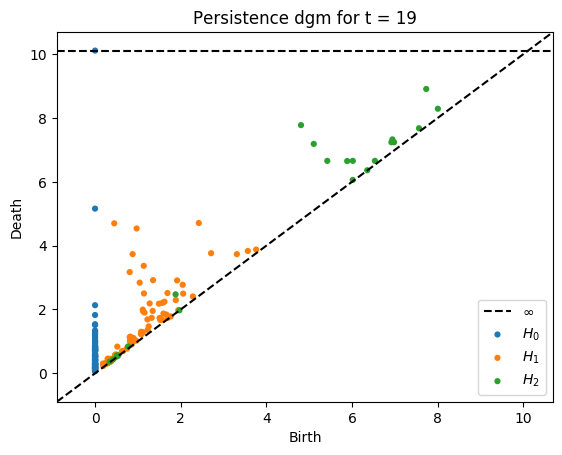

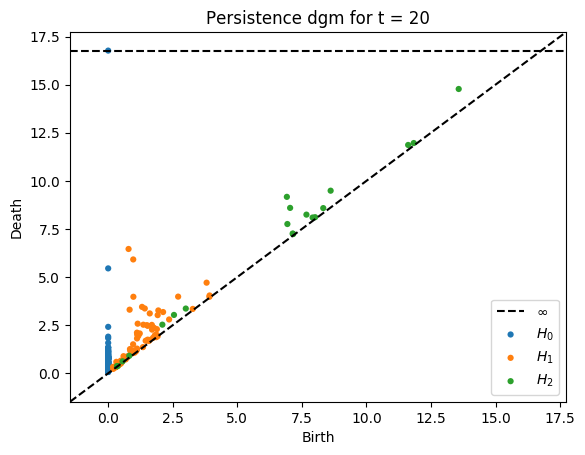

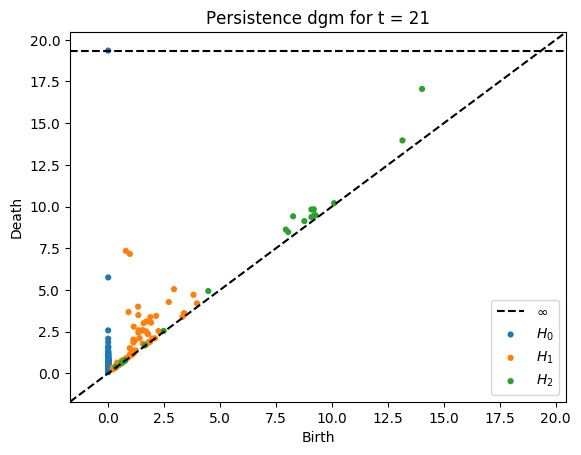

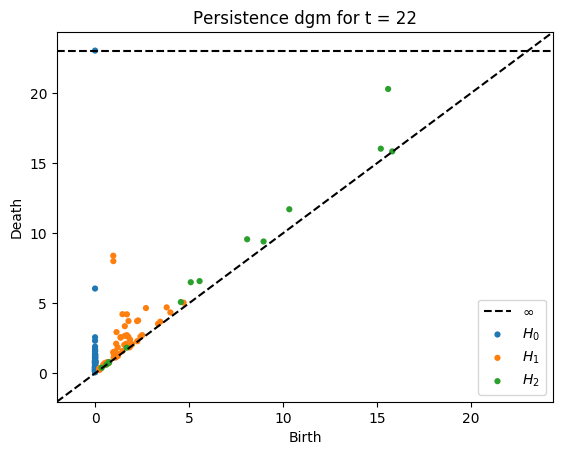

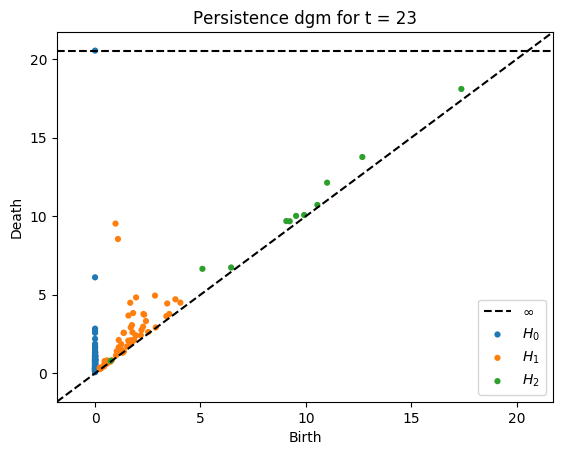

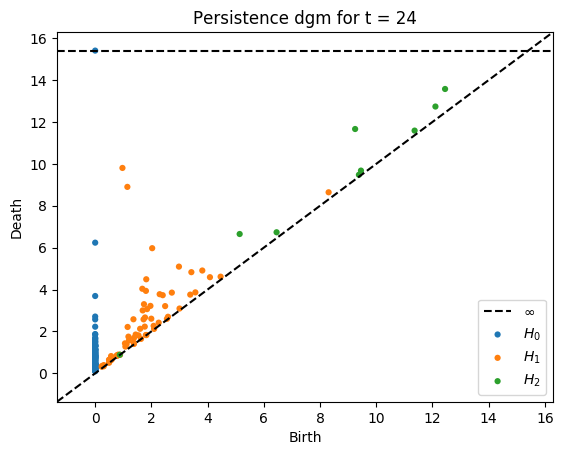

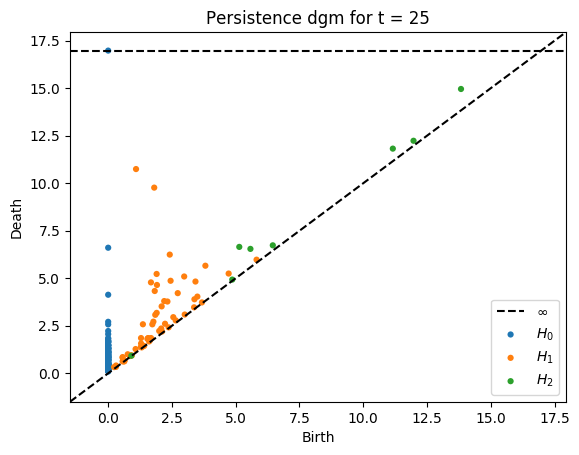

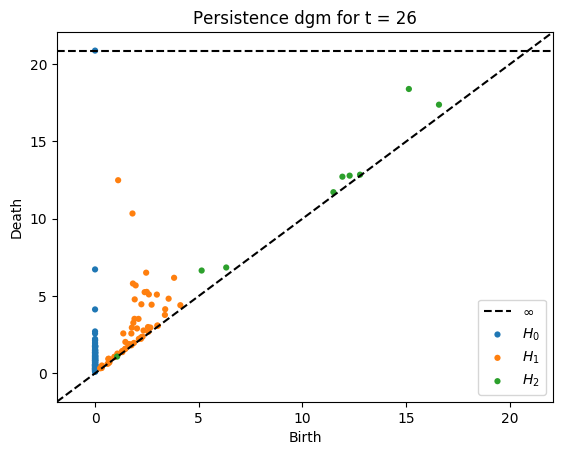

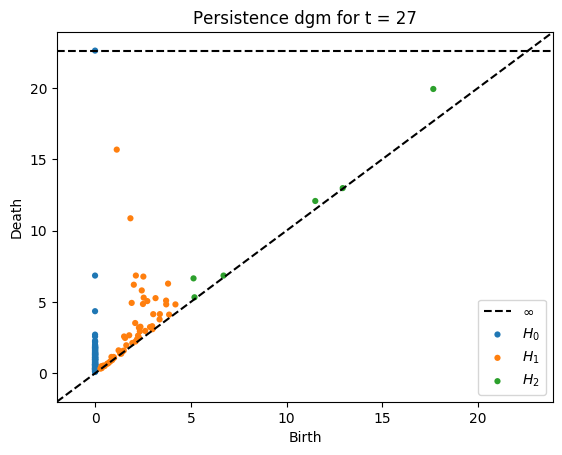

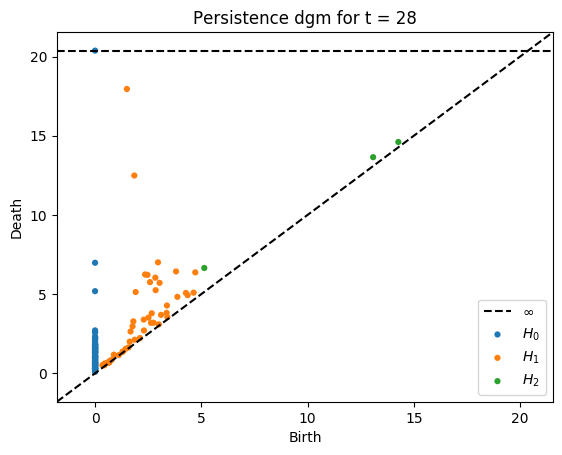

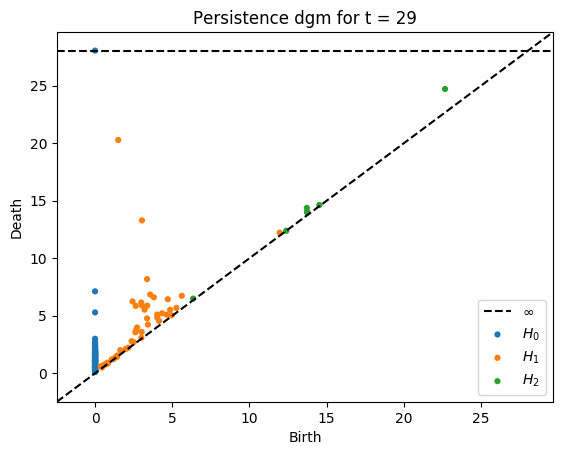

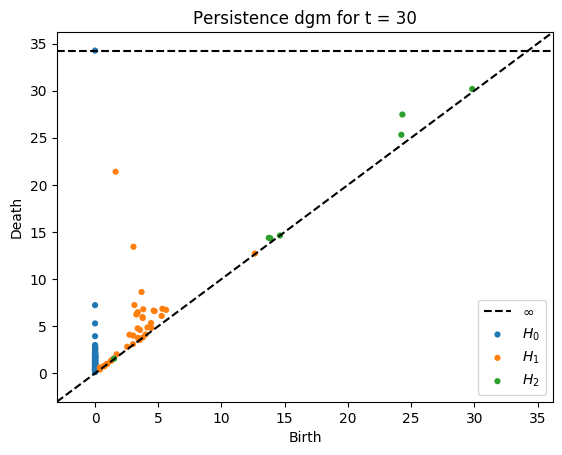

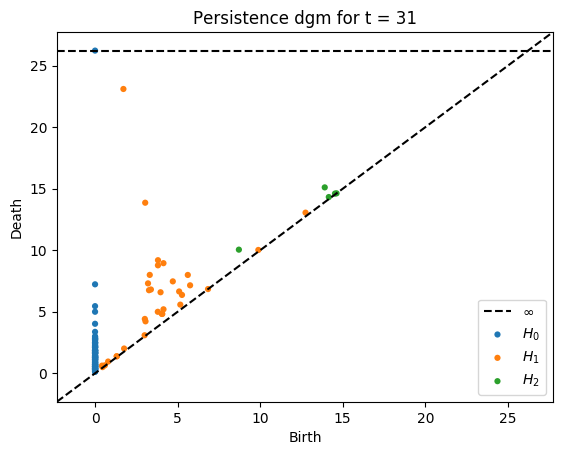

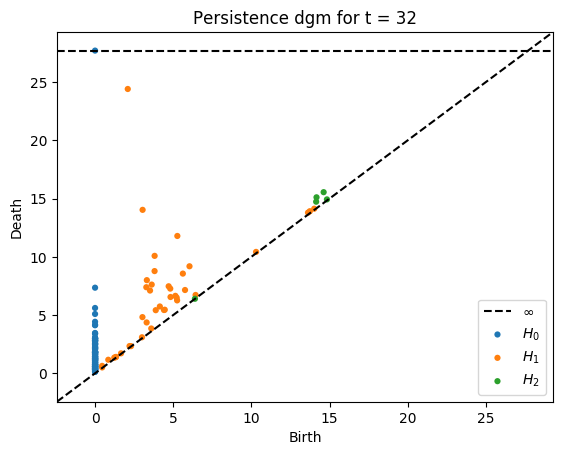

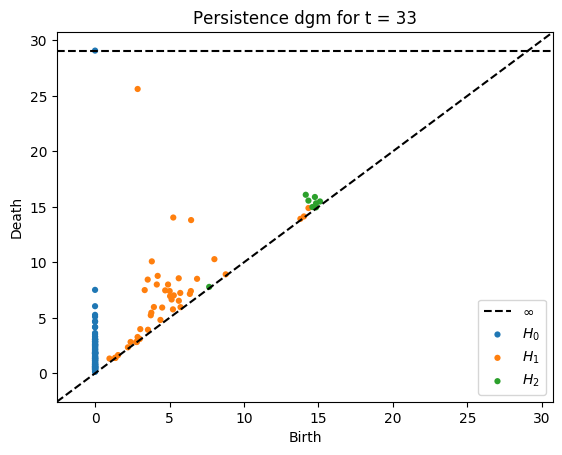

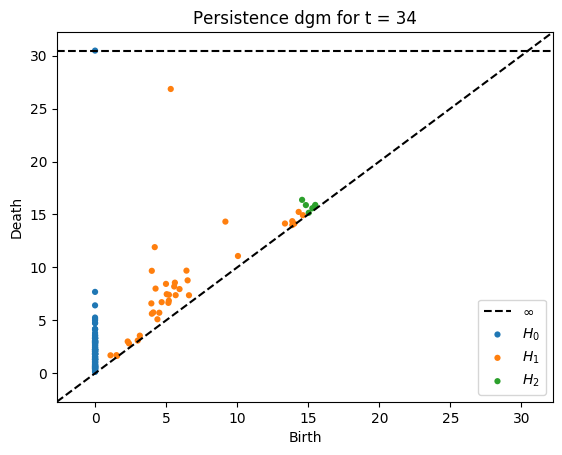

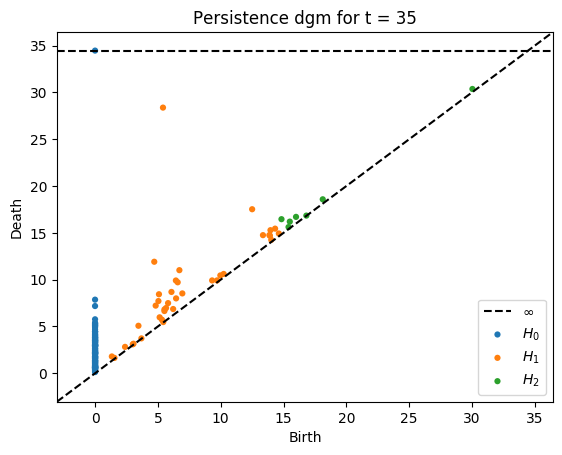

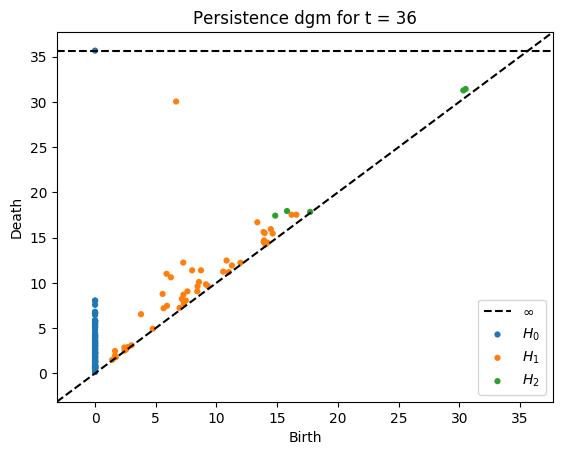

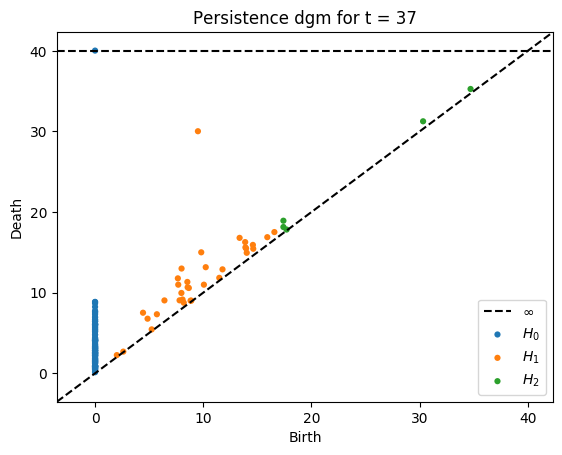

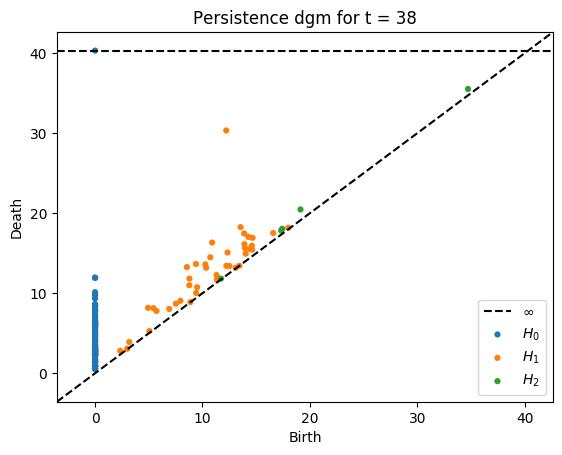

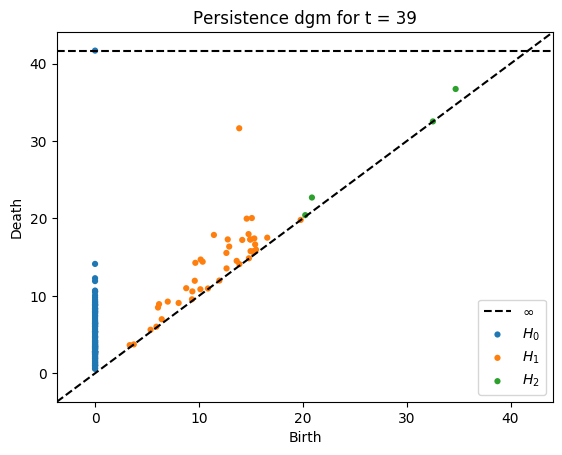

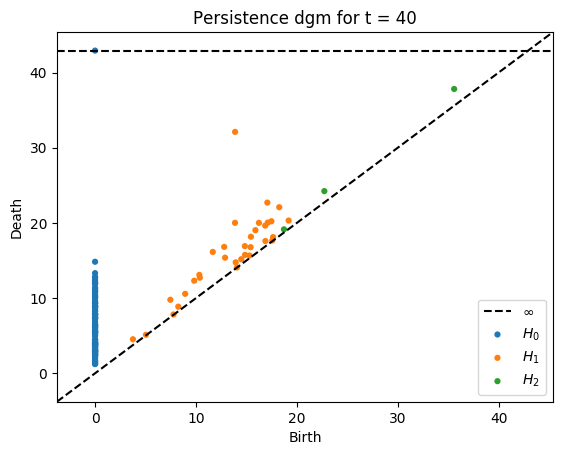

In [20]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)